# 13-1. 들어가며
---


### 학습 전제
---
- **numpy, pandas를 활용해서 표 데이터**를 다뤄본 적이 있고, 이에 대한 기본적인 활용을 할 수 있다.      
- **pandas의 문법과 다양한 메서드를 활용**해본 적이 있고, 코드를 보면 어느정도 **이해**할 수 있다.      
- **matplotlib을 활용해서 데이터 시각화**를 해본 적이 있고, 코드를 보면 어느정도 이해할 수 있다.      
- 데이터셋을 **train/test 데이터셋**으로 나누어서 모델을 **학습 및 검증**해본 경험이 있다.      

### 학습 목표
---
- 다양한 피쳐가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피쳐에는 무엇이 있는지 생각해본다.      
- 모델 학습을 시작하기 전 모든 컬럼에 대해 **그래프 시각화, 피벗 테이블** 등을 활용하며 다양한 방법으로 충분한 **EDA**를 진행한다.      
- 모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩 등으로 적절하게 진행한다.      
- 전체 데이터셋을 **train/test** 데이터셋으로 나누고, 적절한 **분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교**해본다.      

### 목차
---
+ 1. 포켓몬, 그 데이터는 어디서 구할까      
1) 안녕, 포켓몬과 인사해!                
2) 포켓몬, 그 데이터는 어디서 구할까          
3) 포켓몬 데이터 불러오기         
+ 2. 전설의 포켓몬? 먼저 샅샅이 살펴보자!      
1) 결측치와 전체 칼럼       
2) ID와 이름             
3) 포켓몬의 속성       
4) 모든 스탯의 총합       
5) 세부 스탯       
6) 세대      
+ 3. 전설의 포켓몬과 일반 포켓몬, 그 차이는?      
1) 전설의 포켓몬의 Total값      
2) 전설의 포켓몬의 이름      
+ 4. 모델에 넣기 위해! 데이터 전처리하기      
1) 이름의 길이가 10 이상인가?      
2) 이름에 자주 쓰이는 토큰 추출      
3) Type 1 & 2! 범주형 데이터 전처리하기      
+ 5. 가랏, 몬스터볼!      
1) 가장 기본 데이터로 만드는 베이스라인      
2) 의사 결정 트리 모델 학습시키기      
3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?      
4) 의사 결정 트리 모델 다시 학습시키기      

---

오늘은 이러한 분류 문제를 풀기 위해 데이터를 밑바닥부터 샅샅이 뜯어보는 연습을 할 것입니다.      
이러한 과정을 **탐색적 데이터 분석(Exploratory Data Analysis, 이하 EDA)** 라고 합니다.      
EDA는 더 좋은 데이터 분석과 더 좋은 머신러닝 모델을 만들기 위해 필수적인 과정입니다.       

# 13.4 Bring pokemon data
### Library
---
> numpy와 pandas는 1차원 또는 2차원 형식의 표 데이터를 다루기에 최적화된 라이브러리입니다.      

> seaborn과 matplotlib 은 데이터를 그래프 등으로 시각화할 때 쓰이죠. 특히, seaborn은 matplotlib의 상위 버전으로, matplotlib이 조금 더 단순하지만 raw한 느낌이라면, seaborn은 보다 고급화된 그래프를 그릴 수 있습니다.
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
print('슝=3')

### Datasets as pandas
---

In [2]:
# save pokemon data in original data
import os
csv_path = os.getenv("HOME")+"/aiffel/pokemon_eda/data/pokemon.csv"
original_data = pd.read_csv(csv_path)

In [3]:
# we will duplicate the original data and change the variable as pokemon data
# this is to reserve the original data as it is
# let's do this
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# our aim is to check whether the pokemons are legendary or not 
# therefore we will save non-legendary pokemons in the legendary variable; legendary == True and otherwise, legendary == False

# legendary pokemon dataset
legendary = pokemon[pokemon["Legendary"]==True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [7]:
# ordinary pokemon dataset
ordinary = pokemon[pokemon["Legendary"]==False].reset_index(drop=True)
# reset_index(drop=True) drops the current index of the DataFrame and 
# replaces it with an index of increasing integers. 
# It never drops columns. So, in your interactive session, _worker_id was a column.
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 13-5. Legendary Pokemon? First, let's take a look! (1) Missing values and all columns
### check for empty data
---

pokemon.isnull() : Detect missing values for an array-like object.

In [9]:
pokemon.isnull().sum()

# there are 386 empty slots in Type 2. This means there are existing pokemons that are included in Type 1 but not 2

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### Understanding Total Column
---
800 data, 13 Columns. We can understand  each one of the data since it's not that big.

In [10]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 13-6. Legendary Pokemon? First, let's take a look! (2) ID & Name
- #: ID NUMBER
---
Let's check the first column

In [21]:
len(set(pokemon['#']))

# python's set data type cannot have duplicated data. # column isn't unique & cannot be used as index
# so we get 721, not total 800. It's predictable that there are columns that share the same digits

721

In [22]:
# let's check the same # value pokemonds as an example, #6
pokemon[pokemon['#']==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


- NAME
---
It's a string data type. Make pokemon["NAME"] as a set data and check len(), which stands for the length

In [24]:
len(set(pokemon['Name']))
# 800 total. All of the names are unique.

800

# 13-7. Legendary Pokemon? First, let's take a look! (3) Pokemon properties
- TYPE 1 & TYPE 2
---


In [25]:
pokemon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [28]:
# find out how many types of properties there are in the dataset
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

# 18 pokemon properties in type 1 and 19 in type 2

(18, 19)

In [32]:
# but why? let's find out using Python Set difference() Method

properties_difference = set(pokemon["Type 2"]) - set(pokemon["Type 1"])
properties_difference

# {nan} means that the set difference is Nan. both share the list of properties

{nan}

In [33]:
# Save all of pokemon types in the types variable
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ghost', 'Steel', 'Ice', 'Ground', 'Fighting', 'Flying', 'Rock', 'Dark', 'Poison', 'Electric', 'Water', 'Grass', 'Fairy', 'Bug', 'Fire', 'Dragon', 'Normal', 'Psychic']


In [34]:
# How many pokemons have only one type? They must have the value of NaN in Type 2 column.
# let's use isna() function (Detect missing values.) in order to find out the number of empty data
pokemon["Type 2"].isna().sum()

386

- Type 1 data distribution plot
---
Let's visualise the lengendary pokemon data.     
We will use:
- plt's subplot like plt.subplot
- seaborn's countplot like sns.countplot
countplot is literally the count of data

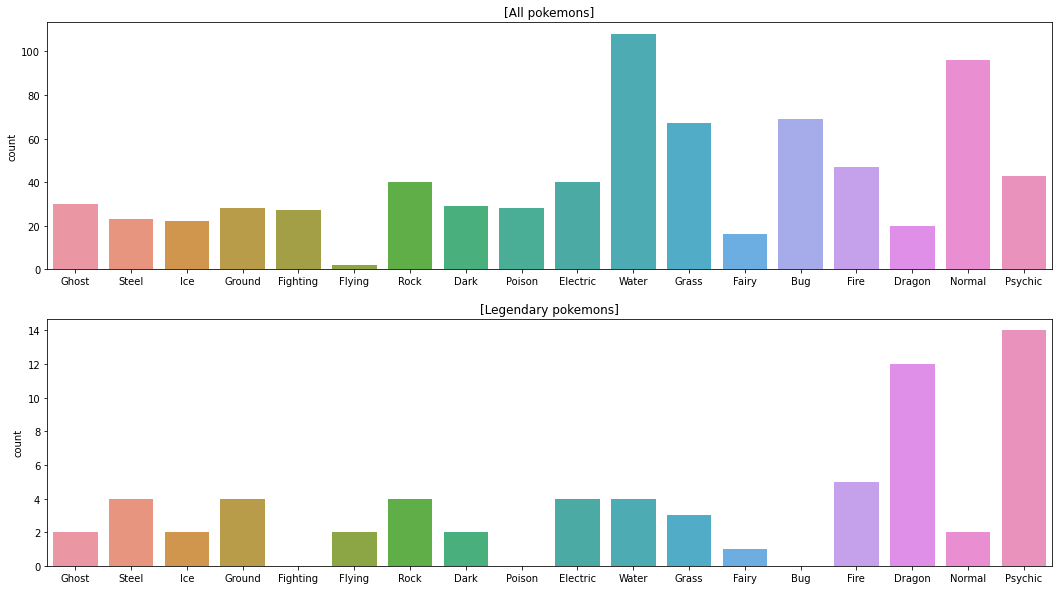

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,10))

plt.subplot(211)
sns.countplot(data = ordinary, x = "Type 1", order = types).set_xlabel('')
plt.title("[All pokemons]")
                                                                       
plt.subplot(212)
sns.countplot(data = legendary, x = "Type 1", order = types).set_xlabel('')
plt.title("[Legendary pokemons]")
                                                                        
plt.show()

In [42]:
# Let's check the percentage of Legendary Pokémon in each attribute with a pivot table. 
# I used sort_value() to sort from the highest to the lowest.

# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블

# pd.pivot_table()    and    .sort_values()
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


- Type 2 data distribution plot       
*Remember there are NaN values in Type 2, but when we use countplot it gets ***excluded automatically.***

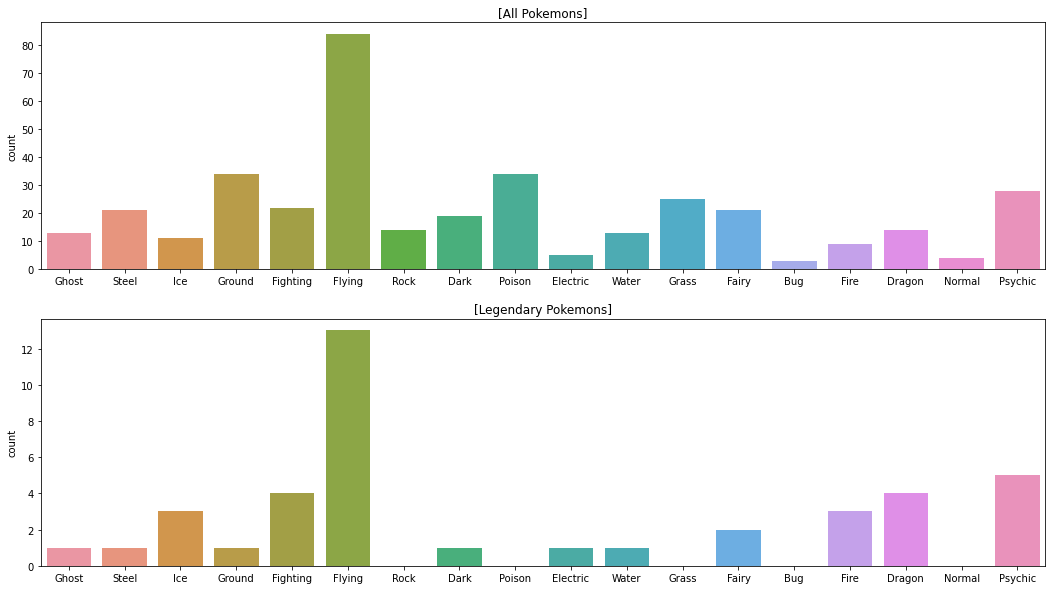

In [43]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [47]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블

# pd.pivot_table()    and    .sort_values()
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


# 13-8. Legendary Pokemon? First, let's take a look! (4) Total sum of all stats
### Total : 모든 스탯의 총합
---
There are total 6 types of stat values as we've seen on 13.7

In [50]:
# save stat types in the variable, stats

stats = ["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [49]:
# This is the code that verifies the first Pokemon.

print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Sp.Atk', 'Sp.Def'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"